# Lecture 1 Introduction

1. Supervised learning 
    - regression(continous value)
    - classification
    pb: how to present a poin that lies in an infinite dimensional space.

2. Learning theory
    explain how the algorithms do the works and garantee the accuracy, to know the pattern

3. Unsupervised learning
    - a single image to do 3d reconstruction with clustering
    - cocktail party problem(source seperation question): ICA in EEG data

4. Reinforcement learning
    doing the whole sequence over time of making a good/woring decision instead of one short decision.

# Lecture 2 An application of Supervised learining

## 1. Linear regression
preducting a continous value like steering direction of autonomous cars.

X1: Size(feet^2) | X2: Nb of rooms | Y: price($)
 --- | --- | --- | 
2104 | 2 | 400


m = training example  
x = input variables/feature  
y = output variable/target  
(x, y) training example  
$i^{th}$ training exampele ($x^{i}, y^{i}$)

### 1.1 Hypothesis and model
   - define a hypothesis **H** : maps from input X to outputs Y.
   - define a learning algorithm for **H** : $ H(X) = \theta_0 + \theta_1*X$
   
$$h(x) = h_{\Theta}(x) = \Theta_0 + \Theta_1*x_1 + \Theta_2*X_2 $$ where ${\theta}$ is the paremeter of model.

for conciseness, define $X_0$ = 1

$$ h(x^j) = \sum_{i = 0}^2 \Theta_ix_i^j = \Theta^Tx^j $$

### 1.2 Cost function:
$$ J(\Theta) = \frac{1}{2} \sum_{i=1}^m (h_\theta(x^i) - y^i)^2 = \frac{1}{2} (h_\theta(X) - Y)^2$$
* objectif : $$\underset{\Theta}{\min} J(\Theta) $$

### 1.3 Fit parameters $\Theta$ 

#### 1.3.1 Gradient descent

- start with some $\Theta$ (Say $\Theta = \vec{0} $)
- then, updating $\Theta$ to reduce J($\Theta$) with learning rule:

$$\Theta_i := \Theta_i - \alpha \frac{\partial}{\partial \Theta_i} J(\Theta) $$  
with $\alpha$ is learing rate which present the learning speed (hyperparameter set by hand)

- for one example:
$$\frac{\partial}{\partial \Theta_i} J(\Theta) = \frac{\partial}{\partial \Theta_i} \frac{1}{2} (h_\theta(x) - y)^2 = (h_\theta(x) - y)* x_i$$
finally,we get 
$$\Theta_i := \Theta_i - \alpha * (h_\theta(x) - y)* x_i $$  

- for m example, repeat until convergence:
$$\Theta_i := \Theta_i - \alpha \frac{\partial}{\partial \Theta_i}\frac{1}{2} \sum_{j}^m (h_\theta(x^j) - y^j)^2 = \Theta_i - \alpha \sum_{j=1}^m (h_\theta(x^j) - y^j)*x_i^j $$  

the above **Batch Gradient Descent :** in each iteration, we gonna use the entire dataset
one altenative method is **Stochastic Gradient Descent :** incremental form which is much faster and converges to the global optimum exactly. 

repeat \{  
    for j = 1 to m \{  
    **for all values of i**
        $$\Theta_i: = \Theta_i - \alpha (h_\theta(x^j) - y^j)*x_i^j $$   
    \}  
\}

One another method is **Minimal Batch Gradient Descent** MBGD which is a compromise bewteen BGD and SGD: take a few data (hyperparameter : n) in one iteration:
 $$\Theta_i: = \Theta_i - \alpha \frac{1}{n} \sum_{k=j}^{j+n}(h_\theta(x^j) - y^j)*x_i^j $$   

### 1.3.2 Normal equation
$f : \mathbb{R}^{m\times n} \mapsto \mathbb{R}$  
 tr AB = tr BA  
 tr ABC = tr CAB = tr BCA  
$\triangledown_A tr AB = B^T $  
 $\triangledown_A tr ABA^TC = CAB + C^TAB^T $   
 tr A = tr$ A^T$  
 
  $$\triangledown_{\Theta} J(\Theta) = \triangledown_{\Theta} \frac{1}{2} (X\Theta - y)^T(X\Theta - y)  
  =\triangledown_{\Theta} \frac{1}{2} tr (X\Theta - y)^T(X\Theta - y) $$
  $$= X^TX\Theta - X^Ty \Rightarrow 0$$
  
  we get Normal equations: $$X^TX\Theta = X^Ty $$  
  the value of θ that minimizes J(θ) is given in closed form:
  $$\Theta =(X^TX)^{-1}X^Ty$$
*when the data shape is too big, the inverse of matrix X is unsolvable, so we should use Gradient descent*  
Linear regression:  
to minimize J($\theta$) and return $\theta^TX$

 More information: https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression
 
 ### 1.4 local weight regression
Linear regression:  
to minimize J($\theta$) and return $\theta^TX$

LWR: fit $\theta$ to minimize:   
$$\sum_{i=1}^m w^i * (h_\theta(x^i) - y^i)^2$$
where $w^i = exp(-\frac{(x^i-x)^2}{2}) \in [0,1]$  
or, $w^i = exp(-\frac{(x^i-x)^2}{2\tau}) \in [0,1]$ and $\tau $ is bandwidth and controls the dispersion like gaussian distribution


### 1.5 Probabilistic interpretation
This is an alternative method to define the cost function.
Assume $y^i = \Theta^TX^i + \epsilon^i$ where $\epsilon $ is random noise  
$\epsilon^i \hookrightarrow  \mathcal{N}(0,\,\sigma^{2})  $  

$$ P(\epsilon^i) = \frac{1}{{\sigma \sqrt {2\pi}}} e^{- {\epsilon^i}^2/{2\sigma ^2 }}$$
$y^i \hookrightarrow  \mathcal{N}(\Theta^ix^i,\,\sigma^{2}),  \epsilon^i = y^i - \Theta^TX^i$ , so:
$$ P(y^i|x^i,\Theta) = \frac{1}{{\sigma \sqrt {2\pi}}} e^{- ({y^i -\Theta^Tx^i})^2/{2\sigma ^2 }}$$
why using gaussian? central limite theorem: adding some independent variables, the result return to gaussian.
$\epsilon^i$ is iid. independently identically distributed:
###### Likelihood 
$$L(\Theta) =  P(\Theta;X, \vec{y})=P(\vec{y}|X; \Theta) = \prod_{i=1}^{m}P(y^i|x^i;\Theta) = \prod_{i=1}^{m} \frac{1}{{\sigma \sqrt {2\pi}}} e^{- ({y^i -\Theta^Tx^i})^2/{2\sigma ^2 }}$$ 

The notation “$P(y^i|x^i;\Theta) $” indicates that this is the distribution of y(i) given x(i) and parameterized by θ. Note that we should not condition on θ ($“P(y^i|x^i,\Theta)$ ”) which means two conditions $x^i$ and $\Theta$ are satisfait at same time. since θ is not a random variable. We can also write the distribution of y(i) as as y(i) | x(i); $\hookrightarrow  \mathcal{N}(\Theta^ix^i,\,\sigma^{2})$.
###### Maximun likelihood
$$ \Theta^* = \underset{\Theta}{\arg\max} L(\Theta) = \underset{\Theta}{\arg\max} \log L(\Theta) = \underset{\Theta}{\arg\max} \sum_{i=1}^{m} - ({y^i -\Theta^Tx^i})^2/{2\sigma ^2 }$$  $$ = \underset{\Theta}{\arg\min} \sum_{i=1}^{m} ({y^i -\Theta^Tx^i})^2/{2\sigma ^2 } = {\arg\min} J(\Theta)$$  

### 1.6 Implementation
**sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)**

Attribute | - | - 
--- | --- | ---
coef_ | array | shape(n_features,)
intercept_ | array | shape(n_features,)

Method: | input | return
--- |: --- |: ---
fit(X,y,sample_weight=None) | X,y training and label data, sample_weight :Individual weights for each sample | self: an instance of self
get_params(deep=True)| Boolean | Parameter names mapped to their values
predict(X) | sample,shape (n_samples, n_features) | predicted value: array,shape (n_samples,)
score(X,y,sample_weight=None) | wrt. fit() | float: Returns $R^2$ of self.predict(X) wrt. y
set_params(**params)

Metric:  
$$\mathbb{R}^2 = 1 - \frac{(\sum\hat{y}^i - y^i)^2}{(\sum {y}^i - \bar{y})^2} $$
- if R^2 <=0, the model is nul because the predict result is random.
- if R^2 is close to 1, the model is perfect.


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/houses.txt',header = None,names=['area','Room_nb','price'],delimiter = '\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
area       47 non-null int64
Room_nb    47 non-null int64
price      47 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB


In [3]:
X = df[['area','Room_nb']]
y = df[['price']]
X.head()

,area,Room_nb
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


Text(0.5,0,'Room number')

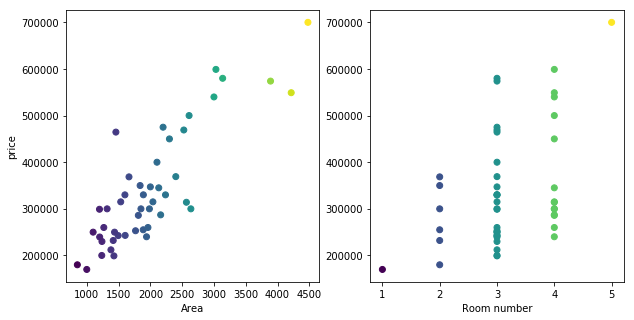

In [4]:
fig = plt.figure(figsize = (10,5))
plt.subplot2grid((1,2),(0,0))
plt.scatter(X.area,y, c = X.area)
plt.xlabel('Area')
plt.ylabel('price')

plt.subplot2grid((1,2),(0,1))
plt.scatter(X.Room_nb,y,c = X.Room_nb)
plt.xlabel('Room number')


In [5]:
lr = LinearRegression().fit(X,y)
lr.coef_

array([[  139.21067402, -8738.01911233]])

In [6]:
lr.intercept_

array([89597.9095428])

In [7]:
lr.score(X,y)

0.7329450180289141

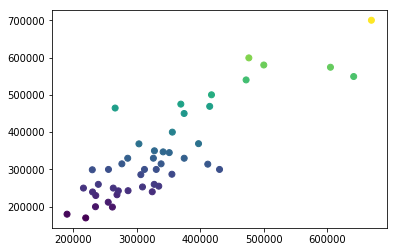

In [8]:
result = lr.predict(X)
plt.scatter(result,y, c=y)

In [9]:
lr.get_params(deep=True)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

Reference :  
[Matrix calculus](https://en.wikipedia.org/wiki/Matrix_calculus)  
[cs229_linear regression note1](http://cs229.stanford.edu/notes/cs229-notes1.pdf)  
[sklearn_LR](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)